In [1]:
# %pip install --upgrade huggingface_hub transformers

In [2]:
from getpass import getpass

HUGGINGFACEHUB_API_TOKEN = getpass('Please enter your HuggingFace Token here: ')

In [3]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "HUGGINGFACEHUB_API_TOKEN"

In [5]:
from huggingface_hub import login

login(HUGGINGFACEHUB_API_TOKEN)  # store securely, do not hardcode in shared code

In [6]:
# import os
# if "HUGGINGFACE_HUB_TOKEN" in os.environ:
#     del os.environ["HUGGINGFACE_HUB_TOKEN"]

In [11]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [8]:
# from transformers import GPT2Tokenizer, GPT2LMHeadModel

# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# model = GPT2LMHeadModel.from_pretrained("gpt2")

# input_text = "Once upon a time"
# inputs = tokenizer(input_text, return_tensors="pt")
# outputs = model.generate(**inputs, max_new_tokens=50)

# print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [12]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M 
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [13]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

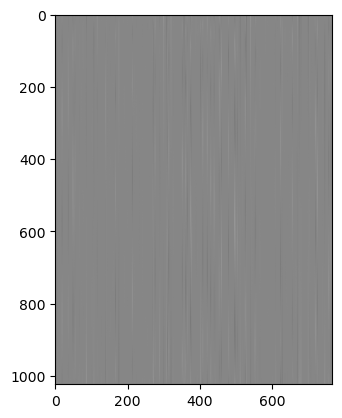

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")